In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cvxopt import matrix, solvers

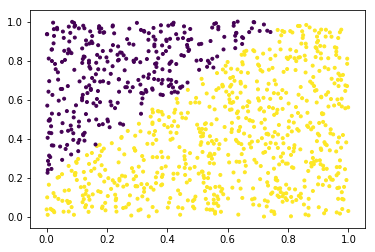

In [6]:
dataset = pd.read_csv("data/Data.csv")

dataset_x = dataset.drop("label", axis = 1).values
dataset_y = dataset["label"].values

dataset_y[dataset_y == 0] = -1

x_train = dataset_x[:1000]
y_train = dataset_y[:1000]
x_test = dataset_x[9000:]
y_test = dataset_y[9000:]

plt.scatter(x_train[:1000, 0], x_train[:1000, 1], c = y_train[:1000], marker = ".")

In [7]:
def Kernel(x, y):
    return np.dot(x, y)

In [8]:
def svm(x_train,y_train,l,c):
    num_samples = x_train.shape[0]
    K = np.zeros([num_samples, num_samples])
    for i in range(num_samples):
        for j in range(num_samples):
            K[i, j] = Kernel(x_train[i], x_train[j])


    P = np.matmul(y_train.reshape(num_samples, 1), y_train.reshape(1, num_samples))
    P = P * K
    q = -np.ones([num_samples, 1])
    
    if(l=='linear'):
        G = -np.eye(num_samples)
        h = np.zeros([num_samples, 1])
    else:
        G1 = np.eye(num_samples)
        G2 = -G1
        G = np.concatenate((G1,G2))
        h1 = c * np.ones([num_samples, 1])
        h2 = np.zeros([num_samples, 1])
        h = np.concatenate((h1,h2))
    
    b = np.zeros([1, 1])
    A = y_train.reshape([1, num_samples])

    P = matrix(P, tc = "d")
    q = matrix(q, tc = "d")
    G = matrix(G, tc = "d")
    h = matrix(h, tc = "d")
    b = matrix(b, tc = "d")
    A = matrix(A, tc = "d")

    solution = solvers.qp(P, q, G, h, A, b)
    
    mu = np.array(solution["x"])
    
    tolerance = 1e-5
    
    if(l == 'linear'):    
        s = mu > tolerance
    else:
        s1 = mu > tolerance
        s2 = mu < c
        s = s1 and s2
        
    W = 0

    for i in range(num_samples):
        W += s[i] * mu[i] * y_train[i] * x_train[i, :]

    b = 0
    for i in range(num_samples):
        b += (y_train[i] - np.dot(x_train[i, :], W)) * s[i]
    b /= s.sum()
    #plt.scatter(x_train[:1000, 0], x_train[:1000, 1], c = y_train[:1000], marker = ".")
    #plt.plot([0, 1], [-b / W[1], -(W[0] + b) / W[1]])

    accuracy = ((np.matmul(W, x_train.T) + b) * y_train > 0).sum() / num_samples * 100
    
    return mu,s,accuracy

In [9]:
mu,s,accuracy = svm(x_train,y_train,l = 'linear', c= 0)

     pcost       dcost       gap    pres   dres
 0: -3.2631e+02 -6.7086e+02  4e+03  7e+01  2e+00
 1: -8.3574e+02 -9.2429e+02  2e+03  3e+01  1e+00
 2: -1.4872e+03 -1.5948e+03  2e+03  3e+01  1e+00
 3: -1.8505e+03 -1.9708e+03  2e+03  3e+01  1e+00
 4: -5.4889e+03 -5.7117e+03  2e+03  3e+01  1e+00
 5: -5.1345e+04 -5.2068e+04  3e+03  3e+01  1e+00
 6: -8.7475e+04 -8.8641e+04  5e+03  3e+01  1e+00
 7: -1.1256e+05 -1.1439e+05  1e+04  3e+01  1e+00
 8: -1.0332e+05 -1.0826e+05  3e+04  3e+01  1e+00
 9: -1.7084e+05 -1.8746e+05  6e+04  3e+01  9e-01
10: -1.1402e+05 -2.5859e+05  1e+05  3e-11  6e-11
11: -1.7313e+05 -1.7686e+05  4e+03  7e-11  7e-11
12: -1.7594e+05 -1.7597e+05  4e+01  4e-11  6e-11
13: -1.7596e+05 -1.7596e+05  4e-01  7e-11  6e-11
14: -1.7596e+05 -1.7596e+05  4e-03  8e-11  6e-11
Optimal solution found.


In [10]:
def predict(mu,s,x_train,y_train,x):
    num_samples = x_train.shape[0]
    fx = 0
    for i in range(num_samples):
        fx = fx + s[i] * mu[i] * y_train[i] * Kernel(x_train[i],x)
    b = y_train[0]
    for i in range(num_samples):
        b = b - s[i] * mu[i] * y_train[i] * Kernel(x_train[i],x_train[0])
    fx = fx + b
    return fx

In [11]:
print(accuracy)

100.0
